In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python", "scikit-image", "scikit-learn",]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
from tensorflow import keras

/usr/bin/python3
Installing: numpy
Installing: scipy
Installing: matplotlib
Installing: pandas
Installing: opencv-python
Installing: opencv-contrib-python
Installing: scikit-image
Installing: scikit-learn


## Загрузка данных CIFAR-10  
x_train: uint8 NumPy array of grayscale image data with shapes (50000, 32, 32, 3), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of labels (integers in range 0-9) with shape (50000, 1) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 32, 32, 3), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of labels (integers in range 0-9) with shape (10000, 1) for the test data.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


# Задание 1 Old school image classifier



<ipython-input-3-e43dd638d835>:16: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = hog(img, orientations=8, pixels_per_cell=(pixels_per_cell, pixels_per_cell),
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

              precision    recall  f1-score   support

           0       0.60      0.59      0.60      1000
           1       0.61      0.62      0.61      1000
           2       0.43      0.33      0.38      1000
           3       0.38      0.28      0.32      1000
           4       0.42      0.45      0.43      1000
           5       0.42      0.41      0.41      1000
           6       0.51      0.66      0.58      1000
           7       0.49      0.51      0.50      1000
           8       0.56      0.57      0.57      1000
           9       0.58      0.65      0.61      1000

    accuracy                           0.51     10000
   macro avg       0.50      0.51      0.50     10000
weighted avg       0.50      0.51      0.50     10000

              precision    recall  f1-score   support

           0       0.62      0.62      0.62      1000
           1       0.59      0.68      0.63      1000
           2       0.48      0.38      0.43      1000
           3       0.38 

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1000
           1       0.75      0.75      0.75      1000
           2       0.55      0.46      0.50      1000
           3       0.45      0.40      0.42      1000
           4       0.51      0.58      0.54      1000
           5       0.53      0.53      0.53      1000
           6       0.66      0.71      0.69      1000
           7       0.65      0.64      0.65      1000
           8       0.69      0.70      0.70      1000
           9       0.72      0.72      0.72      1000

    accuracy                           0.62     10000
   macro avg       0.62      0.62      0.62     10000
weighted avg       0.62      0.62      0.62     10000



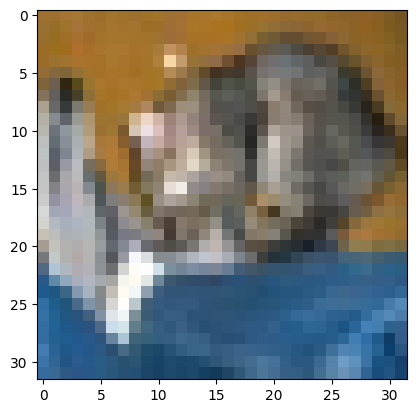

Предсказание модели:  [3]


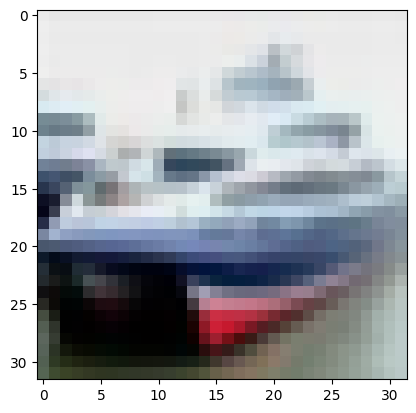

Предсказание модели:  [8]


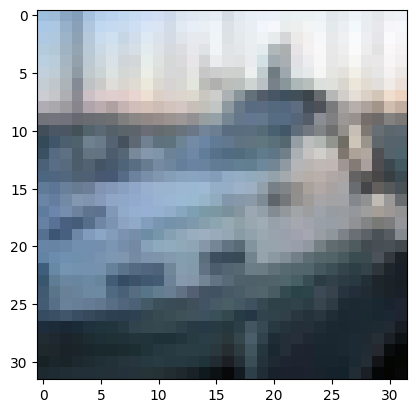

Предсказание модели:  [1]


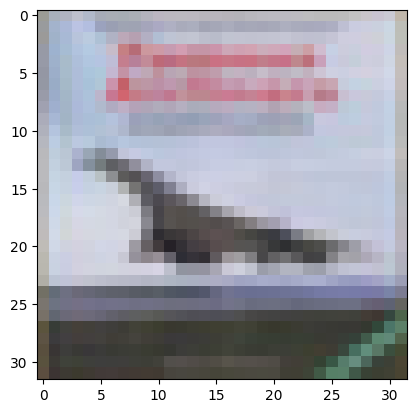

Предсказание модели:  [0]


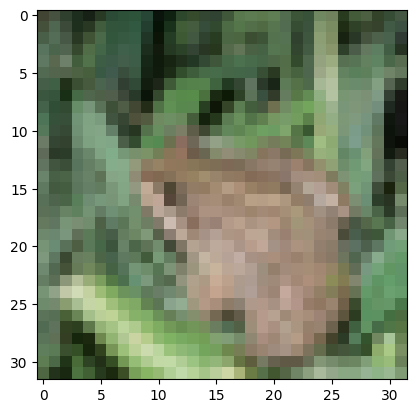

Предсказание модели:  [6]


In [ ]:
from skimage.feature import hog
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def extract_features(images, hist_bins=10, cells_per_block=2, pixels_per_cell=10):
    features = []
    for img in images:
        hist_features = np.histogram(img, bins=hist_bins)
        hog_features = hog(img, orientations=8, pixels_per_cell=(pixels_per_cell, pixels_per_cell),
                           cells_per_block=(cells_per_block, cells_per_block), visualize=False, multichannel=True)
        combined_features = np.hstack((hist_features[0], hog_features))
        features.append(combined_features)
    return np.array(features)

x_train_features = extract_features(x_train)
x_test_features = extract_features(x_test)

scaler = StandardScaler().fit(x_train_features)
x_train_features = scaler.transform(x_train_features)
x_test_features = scaler.transform(x_test_features)

models = [LogisticRegression(), RandomForestClassifier(), svm.SVC()]
for model in models:
    model.fit(x_train_features, y_train)
    y_pred = model.predict(x_test_features)
    print(classification_report(y_test, y_pred))

num_images = 5
for i in range(num_images):
    plt.imshow(x_test[i])
    plt.show()
    print("Предсказание модели: ", model.predict([x_test_features[i]]))


# Задание 2 NN image classifier



Epoch 1/10
1563/1563 [==============================] - 60s 37ms/step - loss: 1.8736 - accuracy: 0.3191 - val_loss: 1.7147 - val_accuracy: 0.3870
Epoch 2/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.6837 - accuracy: 0.3932 - val_loss: 1.6275 - val_accuracy: 0.4089
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5940 - accuracy: 0.4296 - val_loss: 1.5942 - val_accuracy: 0.4363
Epoch 4/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.5381 - accuracy: 0.4478 - val_loss: 1.5255 - val_accuracy: 0.4538
Epoch 5/10
1563/1563 [==============================] - 46s 30ms/step - loss: 1.4991 - accuracy: 0.4612 - val_loss: 1.5409 - val_accuracy: 0.4481
Epoch 6/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4665 - accuracy: 0.4750 - val_loss: 1.4758 - val_accuracy: 0.4732
Epoch 7/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.4380 - accuracy: 0.4832 - val_loss: 1.5538 -

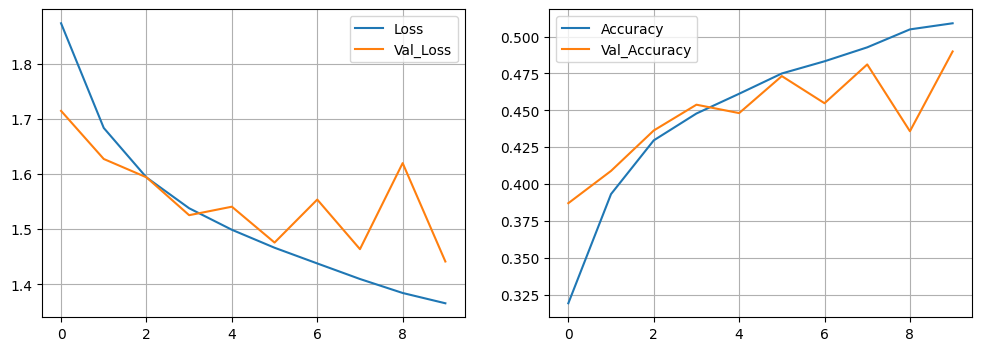

313/313 - 2s - loss: 1.4415 - accuracy: 0.4899 - 2s/epoch - 7ms/step

Test accuracy: 0.48989999294281006
313/313 [==============================] - 2s 6ms/step


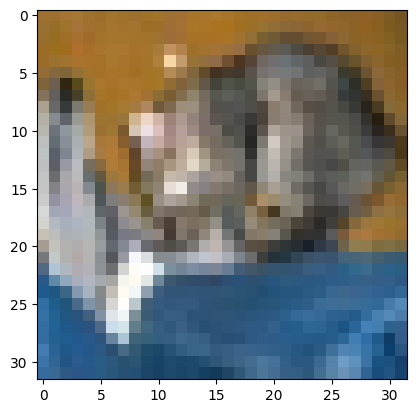

Предсказание модели:  3


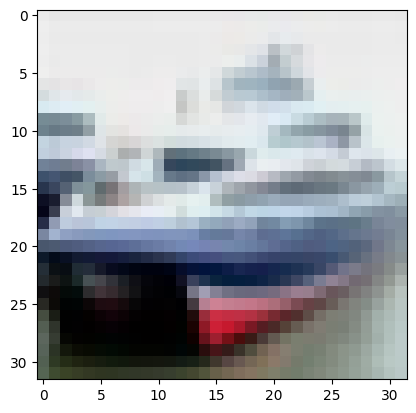

Предсказание модели:  8


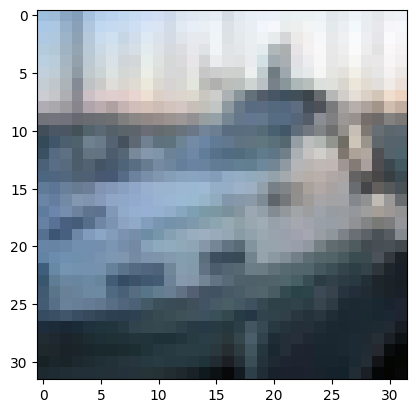

Предсказание модели:  8


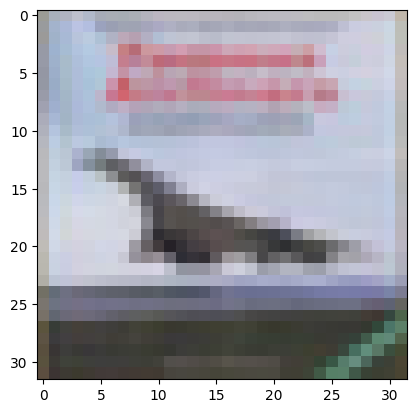

Предсказание модели:  8


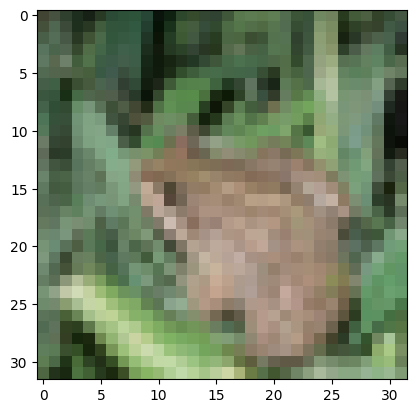

Предсказание модели:  4


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.grid(True)

plt.show()

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

predictions = model.predict(x_test)

num_images = 5
for i in range(num_images):
    plt.imshow(x_test[i])
    plt.show()
    print("Предсказание модели: ", np.argmax(predictions[i]))


# Задание 3 СNN image classifier

In [ ]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size=50,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size=50,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


Эпоха 1, Шаг 100, Потери: 1.7353265285491943
Эпоха 1, Шаг 200, Потери: 1.4909577369689941
Эпоха 1, Шаг 300, Потери: 1.4457489252090454
Эпоха 1, Шаг 400, Потери: 1.1919938325881958
Эпоха 1, Шаг 500, Потери: 1.2233086824417114
Эпоха 1, Шаг 600, Потери: 1.1008137464523315
Эпоха 1, Шаг 700, Потери: 1.3218014240264893
Эпоха 1, Шаг 800, Потери: 0.9587769508361816
Эпоха 1, Шаг 900, Потери: 1.0021992921829224
Эпоха 1, Шаг 1000, Потери: 1.0493160486221313
Эпоха 2, Шаг 100, Потери: 0.9760581851005554
Эпоха 2, Шаг 200, Потери: 1.0218864679336548
Эпоха 2, Шаг 300, Потери: 1.0148472785949707
Эпоха 2, Шаг 400, Потери: 1.0272493362426758
Эпоха 2, Шаг 500, Потери: 0.9954541921615601
Эпоха 2, Шаг 600, Потери: 0.9749226570129395
Эпоха 2, Шаг 700, Потери: 1.0482646226882935
Эпоха 2, Шаг 800, Потери: 0.5336536765098572
Эпоха 2, Шаг 900, Потери: 1.077791690826416
Эпоха 2, Шаг 1000, Потери: 0.8423229455947876
Эпоха 3, Шаг 100, Потери: 0.9220069646835327
Эпоха 3, Шаг 200, Потери: 0.6354946494102478
Эпоха 3, 

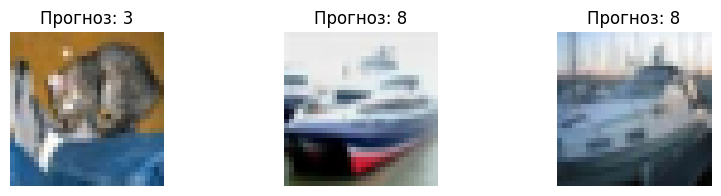

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt


class ImageClassifierCNN(nn.Module):
  def __init__(self):
    super(ImageClassifierCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
    self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(128 * 4 * 4, 512)
    self.fc2 = nn.Linear(512, 10)
    self.dropout = nn.Dropout(0.2)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, 128 * 4 * 4)
    x = F.relu(self.fc1(self.dropout(x)))
    x = self.fc2(self.dropout(x))
    return x

model = ImageClassifierCNN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

for epoch in range(10):
  for i, (inputs, labels) in enumerate(train_loader):
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'Эпоха {epoch+1}, Шаг {i+1}, Потери: {loss.item()}')

model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for inputs, labels in test_loader:
    outputs = model(inputs)
    _, pred = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()
  print(f'Точность модели на тестовых изображениях: {100 * correct / total}%')

inputs = next(iter(test_loader))[0][:3]
outputs = model(inputs)
_, pred = torch.max(outputs.data, 1)
print(f'Прогнозы: {pred}')

images, _ = next(iter(test_loader))

inputs = images[:3]
outputs = model(inputs)
_, pred = torch.max(outputs.data, 1)

fig, axes = plt.subplots(1, 3, figsize=(10, 2))
for i, ax in enumerate(axes):
  img = images[i] / 2 + 0.5
  img = img.permute(1, 2, 0).numpy()
  ax.imshow(img)
  ax.set_title(f"Прогноз: {pred[i]}")
  ax.axis('off')
plt.show()
